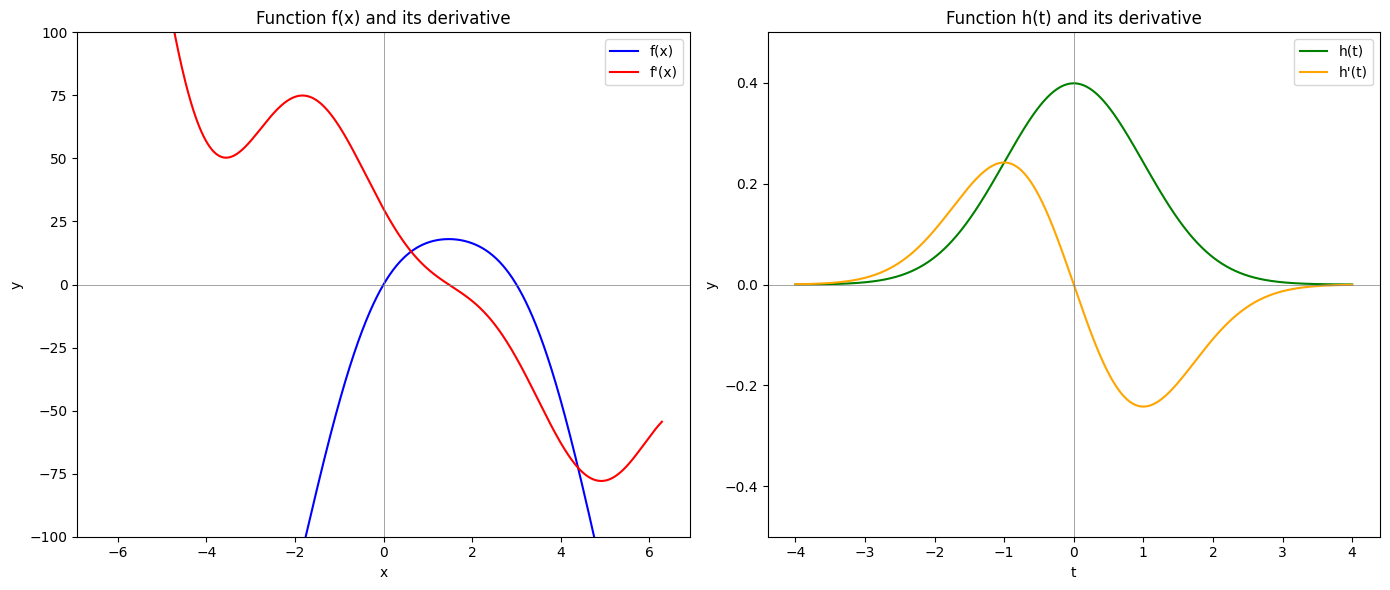

In [ ]:
#Task 1 a)
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

#defining the symbols
x, t = sp.symbols('x t')

#defining the functions
f_sym = 2 * x * (x - 3) * (sp.sin(x) - 5)
h_sym = sp.exp(-1/2 * t**2) / sp.sqrt(2 * sp.pi)

#computing the derivatives
df_sym = sp.diff(f_sym, x)
dh_sym = sp.diff(h_sym, t)

#converting to functions
f_lambdified = sp.lambdify(x, f_sym, 'numpy')
df_lambdified = sp.lambdify(x, df_sym, 'numpy')
h_lambdified = sp.lambdify(t, h_sym, 'numpy')
dh_lambdified = sp.lambdify(t, dh_sym, 'numpy')

#range for x and t
x_vals = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
t_vals = np.linspace(-4, 4, 1000)

#values of functions and their derivatives
f_values = f_lambdified(x_vals)
df_values = df_lambdified(x_vals)
h_values = h_lambdified(t_vals)
dh_values = dh_lambdified(t_vals)

#plots
plt.figure(figsize=(14, 6))

#plot for f(x)
plt.subplot(1, 2, 1)
plt.plot(x_vals, f_values, label='f(x)', color='blue')
plt.plot(x_vals, df_values, label="f'(x)", color='red')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.ylim(-100, 100)
plt.title('Function f(x) and its derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#plot for h(t)
plt.subplot(1, 2, 2)
plt.plot(t_vals, h_values, label='h(t)', color='green')
plt.plot(t_vals, dh_values, label="h'(t)", color='orange')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.ylim(-0.5, 0.5)
plt.title('Function h(t) and its derivative')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

#show plots
plt.tight_layout()
plt.show()


In [ ]:
#Task 1 b)
import numpy as np
from scipy.integrate import quad
from scipy import integrate

def h(t):
    return np.exp(-1/2 * t**2) / np.sqrt(2 * np.pi)

def f(x):
    return 2 * x * (x - 3) * (np.sin(x) - 5)


a_h, b_h = -4, 4
a_f, b_f = -2 * np.pi, 2 * np.pi

#Trapezoidal rule
result_h_trapezoidal = integrate.trapz(h(np.linspace(a_h, b_h, 1000)), np.linspace(a_h, b_h, 1000))
result_f_trapezoidal = integrate.trapz(f(np.linspace(a_f, b_f, 1000)), np.linspace(a_f, b_f, 1000))

#Quad
result_h_quad, _ = quad(h, a_h, b_h)
result_f_quad, _ = quad(f, a_f, b_f)

print("Integral of h(t) using the Trapezoidal rule:", result_h_trapezoidal)
print("Integral of h(t) using quad:", result_h_quad)
print("Integral of f(x) using the Trapezoidal rule:", result_f_trapezoidal)
print("Integral of f(x) using quad:", result_f_quad)


Integral of h(t) using the Trapezoidal rule: 0.9999366517948864
Integral of h(t) using quad: 0.9999366575163339
Integral of f(x) using the Trapezoidal rule: -1578.27417408148
Integral of f(x) using quad: -1578.2698659298353


a) Simpson's 1/3 Rule:
Integral 1: -1.5870477514709591
Integral 2: 18.666666666666664

b) scipy.integrate:
Integral 1: -1.578643
Error 1: 0.000000
Integral 2: 18.666667
Error 2: 0.000000



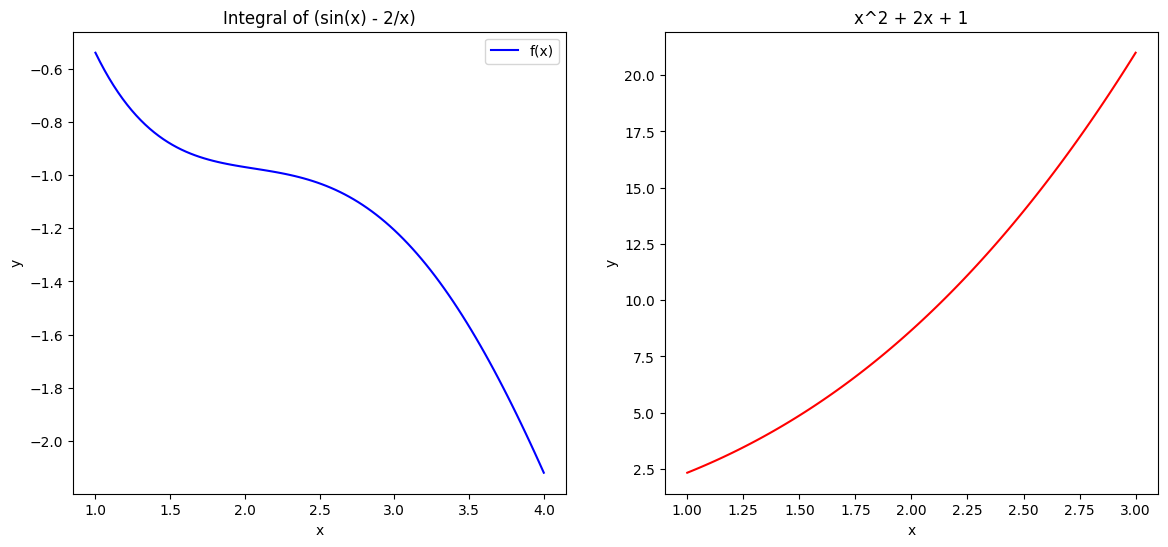

In [ ]:
#Task 2
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import sympy as sp

# Simpson's 1/3 Rule
def simpsons_1_3(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = h/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return integral

# Defining the functions
x = sp.symbols('x')
f1 = sp.sin(x) - 2/x
f2 = x**2 + 2*x + 1

# a) Simpson's 1/3 Rule
a = 1
b = 4
n = 4
integral_1 = simpsons_1_3(np.sin, a, b, n) - simpsons_1_3(lambda x: 2/x, a, b, n)

a = 1
b = 3
n = 2
integral_2 = simpsons_1_3(lambda x: x**2 + 2*x + 1, a, b, n)

print("a) Simpson's 1/3 Rule:")
print("Integral 1:", integral_1)
print("Integral 2:", integral_2)
print()

# b) Using scipy.integrate
integral_1, error_1 = integrate.quad(lambda x: np.sin(x) - 2/x, 1, 4)
integral_2, error_2 = integrate.quad(lambda x: x**2 + 2*x + 1, 1, 3)

print("b) scipy.integrate:")
print("Integral 1:", format(integral_1, '.6f'))
print("Error 1:", format(error_1, '.6f'))
print("Integral 2:", format(integral_2, '.6f'))
print("Error 2:", format(error_2, '.6f'))
print()

# c) Using sympy for symbolic integration and plotting

x, t = sp.symbols('x t')

f = sp.sin(x) - 2/x
h = t**2 + 2*t + 1

#symbocal integration
F = sp.integrate(f, x)
H = sp.integrate(h, t)

F_func = sp.lambdify(x, F, 'numpy')
H_func = sp.lambdify(t, H, 'numpy')


x_vals = np.linspace(1, 4, 100)
x_h_vals = np.linspace(1,3,100)

y_vals = F_func(x_vals)
k_vals = H_func(j_vals)

plt.figure(figsize=(14, 6))

#plot for f(x)
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, label='f(x)', color='blue')
plt.title('Integral of (sin(x) - 2/x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#plot for h(t)
plt.subplot(1, 2, 2)
plt.plot(j_vals, k_vals, label='f(x)', color='red')
plt.title('x^2 + 2x + 1')
plt.xlabel('x')
plt.ylabel('y')
# Show the plot
plt.show()



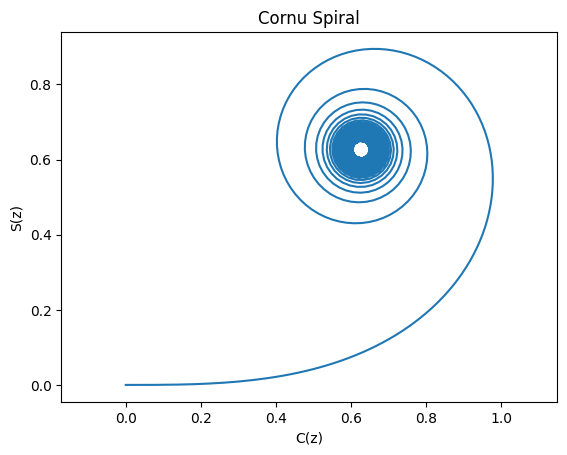

In [ ]:
#Task 3
import numpy as np
import matplotlib.pyplot as plt

def fresnel_integrals(z):
    n = 1000  # number of intervals
    dz = z / n  # segment size

    C = 0
    S = 0

    # trapezoidal rule integration
    for i in range(n):
        x = i * dz
        C += (np.cos(x**2) + np.cos((x + dz)**2)) / 2
        S += (np.sin(x**2) + np.sin((x + dz)**2)) / 2

    C *= dz
    S *= dz

    return C, S

#data points for the Cornu Spiral
z_values = np.linspace(0, 20, 1000)
C_values = []
S_values = []

for z in z_values:
    C, S = fresnel_integrals(z)
    C_values.append(C)
    S_values.append(S)

# plotting the Cornu Spiral
plt.plot(C_values, S_values)
plt.xlabel('C(z)')
plt.ylabel('S(z)')
plt.title('Cornu Spiral')
plt.axis('equal')
plt.grid(True)
plt.show()


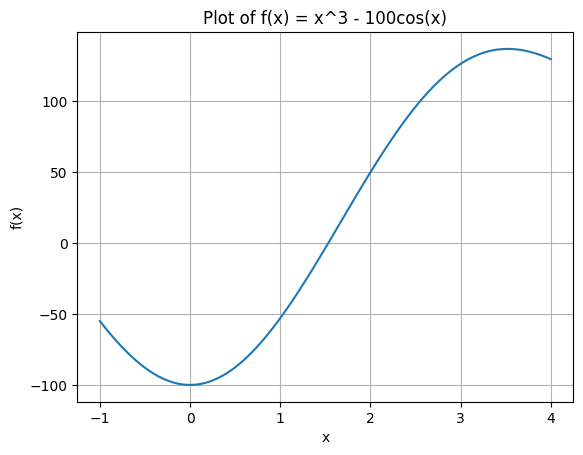

Root found at x = 1.5346454605460167


In [ ]:
#Task 4
# a) Plot and root of x^3 - 100cos(x)
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 100*np.cos(x)

x = np.linspace(-1, 4, 100)
y = f(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x^3 - 100cos(x)')
plt.grid(True)
plt.show()

# bisection method
def bisection_method(f, a, b, tolerance=1e-6, max_iterations=100):
    if f(a) * f(b) >= 0:
        raise ValueError("Function must have opposite signs at interval endpoints.")
    for i in range(max_iterations):
        c = (a + b) / 2
        if abs(f(c)) < tolerance:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    raise ValueError("Bisection method did not converge within the given number of iterations.")

root = bisection_method(f, -1, 4)
print("Root found at x =", root)


In [ ]:
#Task 4 b)
import sympy as sp
import scipy.optimize as optimize


x = sp.symbols('x')
f_x = sp.exp(x) * sp.sin(x) - x**2/2 + 5


f_prime = sp.diff(f_x, x)
f_prime_func = sp.lambdify(x, f_prime, 'numpy')

# numerical optimization to find the critical points
critical_points = optimize.root_scalar(f_prime_func, bracket=[-1, 3], method='brentq')

# critical points are within the specified interval
if critical_points.converged and -1 <= critical_points.root <= 3:
    max_point = critical_points.root
    max_value = f_x.subs(x, max_point)
    print(f"The maximum value of f(x) in the interval [-1, 3] is {max_value}")
else:
    print("No maximum found within the specified interval.")



The maximum value of f(x) in the interval [-1, 3] is 9.87869816423710


In [ ]:
#Task 5
import sympy as sp

def Beta(x, y):
    t = sp.Symbol('t')
    integrand = (sp.sin(t))**(2*x - 1) * (sp.cos(t))**(2*y - 1)
    result = 2 * sp.integrate(integrand, (t, 0, sp.pi/2))
    return result

result = Beta(5, 4)

# a) The value of β(5,4)
print(f"β(5,4) is: {sp.simplify(result)}")

β(5,4) is: 1/280


In [ ]:
#Task 6
import sympy as sp

def Gamma(n):
    x = sp.Symbol('x')
    integrand = x**(n - 1) * sp.exp(-x)
    result = sp.integrate(integrand, (x, 0, sp.oo))
    return result

# a) show that gamma(1/2) = sqrt(π)
sqrt_pi = sp.sqrt(sp.pi)
print(f"sqrt(π) is: {sqrt_pi.evalf()}")
result = Gamma(1/2)
print(f" Γ(1/2) is: {result}")
if(sqrt_pi.evalf() == result):
  print("Showed")
print()
#b The value of  Γ(7/2)
result = Gamma(7/2)
print(f"Γ(7/2) is: {result}")

sqrt(π) is: 1.77245385090552
 Γ(1/2) is: 1.77245385090552
Showed

Γ(7/2) is: 3.32335097044784
